In [1]:
import os
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from PIL import Image

In [3]:
predictions = pd.read_csv('image_to_time_test_result.csv', index_col=0)
predictions.head()

path             datetime  \
8852     G:\My Drive\MIRFLICKR\mirflickr25k\im774.jpg  2008:06:07 10:38:53   
4528   G:\My Drive\MIRFLICKR\mirflickr25k\im13911.jpg  2007:08:01 17:43:00   
4764   G:\My Drive\MIRFLICKR\mirflickr25k\im14195.jpg  2007:08:13 17:45:34   
23763  G:\My Drive\MIRFLICKR\mirflickr25k\im16438.jpg  2007:08:02 01:03:58   
2831   G:\My Drive\MIRFLICKR\mirflickr25k\im12321.jpg  2007:10:12 13:42:33   

       norm_time  class_time  pred  
8852    0.443669        10.0    13  
4528    0.738194        17.0    17  
4764    0.739977        17.0    13  
23763   0.044421         1.0    16  
2831    0.571215        13.0    19

In [4]:
predictions

path             datetime  \
8852     G:\My Drive\MIRFLICKR\mirflickr25k\im774.jpg  2008:06:07 10:38:53   
4528   G:\My Drive\MIRFLICKR\mirflickr25k\im13911.jpg  2007:08:01 17:43:00   
4764   G:\My Drive\MIRFLICKR\mirflickr25k\im14195.jpg  2007:08:13 17:45:34   
23763  G:\My Drive\MIRFLICKR\mirflickr25k\im16438.jpg  2007:08:02 01:03:58   
2831   G:\My Drive\MIRFLICKR\mirflickr25k\im12321.jpg  2007:10:12 13:42:33   
...                                               ...                  ...   
13619   G:\My Drive\MIRFLICKR\mirflickr25k\im3504.jpg  2008:04:09 10:03:48   
19951  G:\My Drive\MIRFLICKR\mirflickr25k\im19896.jpg  2007:05:27 21:05:16   
22565  G:\My Drive\MIRFLICKR\mirflickr25k\im17541.jpg  2007:07:14 18:20:29   
19464  G:\My Drive\MIRFLICKR\mirflickr25k\im20428.jpg  2007:05:26 01:20:06   
8340    G:\My Drive\MIRFLICKR\mirflickr25k\im8175.jpg  2007:12:13 16:18:29   

       norm_time  class_time  pred  
8852    0.443669        10.0    13  
4528    0.738194        17.0    17  
4764    0.739977        17.0    13  
23763   0.044421         1.0    16  
2831    0.571215        13.0    19  
...          ...         ...   ...  
13619   0.419306        10.0    13  
19951   0.878657        21.0    13  
22565   0.764225        18.0    13  
19464   0.055625         1.0    16  
8340    0.679502        16.0    17  

[6060 rows x 5 columns]

In [3]:
def time_loss(output, target):
    lower = np.minimum(output, target)
    upper = np.maximum(output, target)
    loss = np.minimum(np.abs(output-target), lower+(1-upper))
    return loss

<AxesSubplot: ylabel='error'>

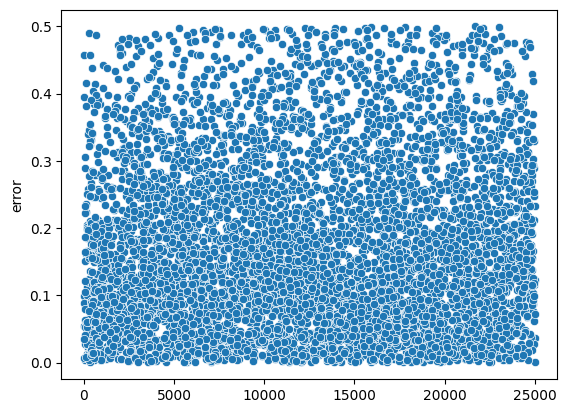

In [4]:
predictions['error'] = time_loss(predictions['norm_time'], predictions['pred'])
sb.scatterplot(predictions['error'])

<AxesSubplot: xlabel='norm_time', ylabel='Count'>

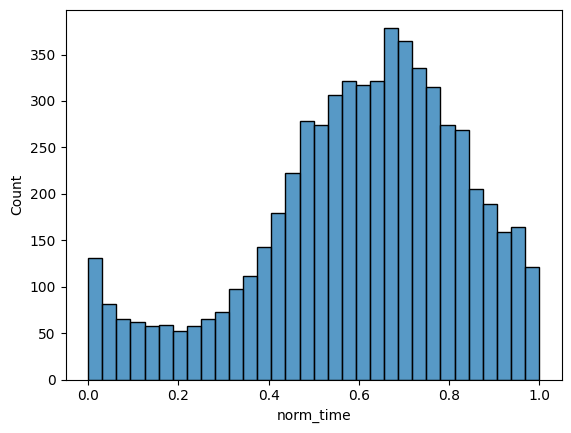

In [5]:
sb.histplot(predictions['norm_time'])

<AxesSubplot: xlabel='pred', ylabel='Count'>

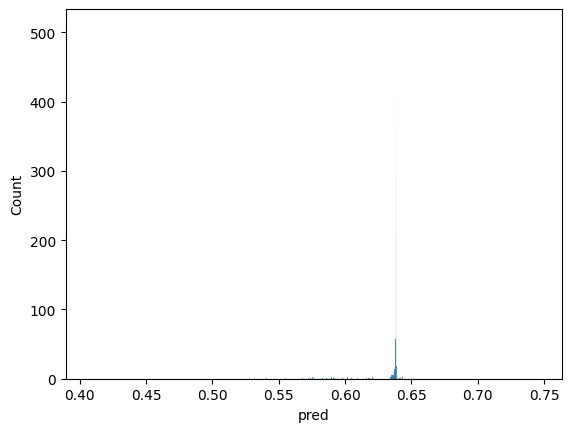

In [6]:
sb.histplot(predictions['pred'])

G:\My Drive\MIRFLICKR\mirflickr25k\im19477.jpg 2007:06:13 20:00:11 0.8334606481481481 0.6385034322738647 0.19495721587428338


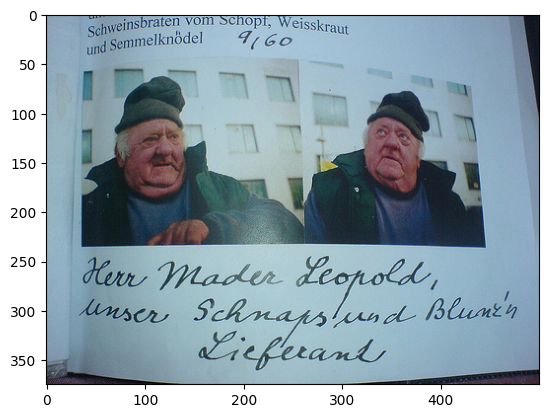

G:\My Drive\MIRFLICKR\mirflickr25k\im24716.jpg 2007:03:23 18:05:51 0.7540625 0.6374703645706177 0.1165921354293823


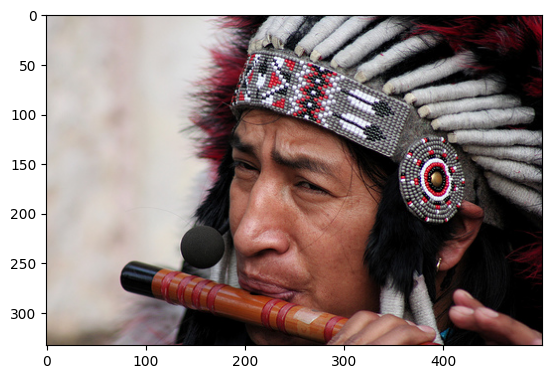

G:\My Drive\MIRFLICKR\mirflickr25k\im5868.jpg 2007:06:26 16:16:18 0.6779861111111111 0.638052225112915 0.03993388599819603


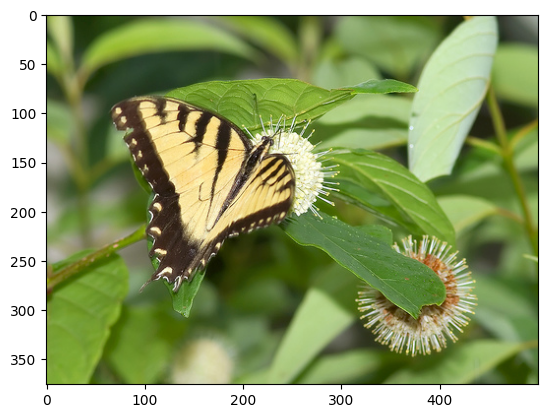

G:\My Drive\MIRFLICKR\mirflickr25k\im23329.jpg 2007:03:25 10:46:00 0.4486111111111111 0.638466477394104 0.18985536628299288


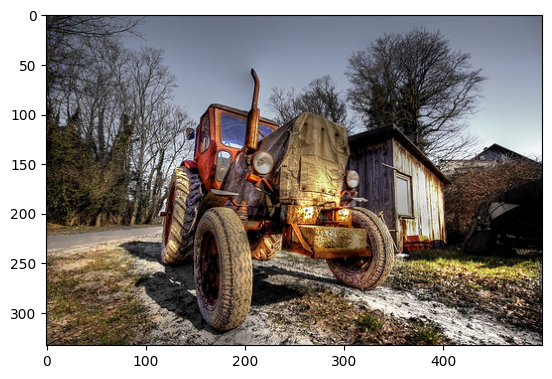

G:\My Drive\MIRFLICKR\mirflickr25k\im18808.jpg 2007:06:24 16:45:30 0.6982638888888889 0.6350933313369751 0.06317055755191381


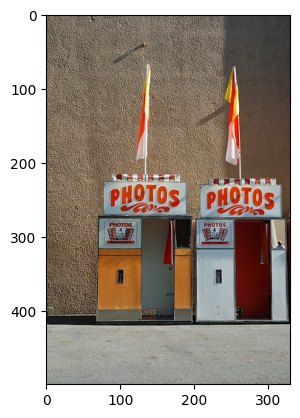

G:\My Drive\MIRFLICKR\mirflickr25k\im17356.jpg 2007:07:01 02:15:46 0.0942824074074074 0.5904030799865723 0.49612067257916487


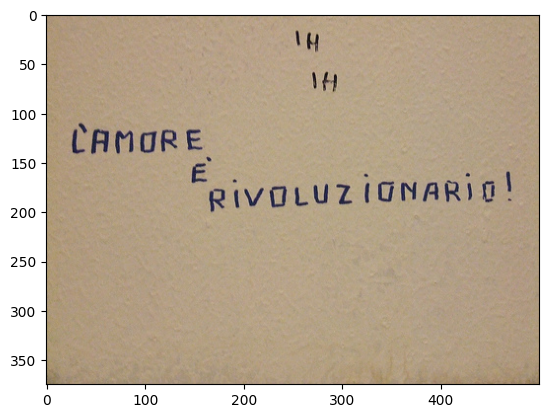

G:\My Drive\MIRFLICKR\mirflickr25k\im4633.jpg 2008:03:18 12:55:42 0.5386805555555556 0.6382390260696411 0.0995584705140855


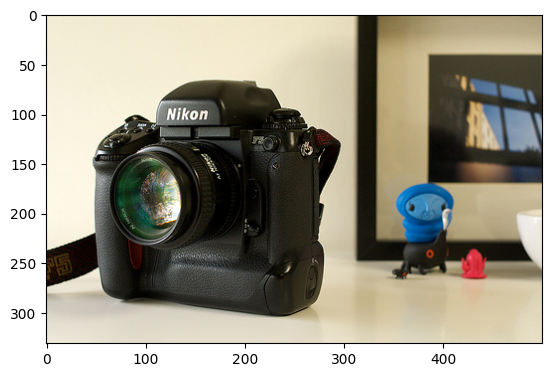

G:\My Drive\MIRFLICKR\mirflickr25k\im3414.jpg 2008:04:09 16:15:36 0.6775 0.6384282112121582 0.03907178878784179


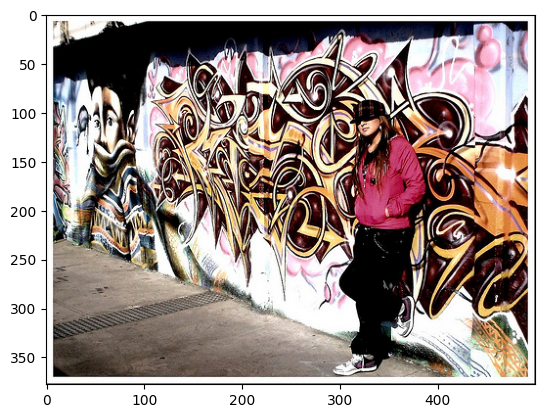

G:\My Drive\MIRFLICKR\mirflickr25k\im24294.jpg 2007:01:18 23:02:35 0.9601273148148148 0.6385900378227234 0.32153727699209145


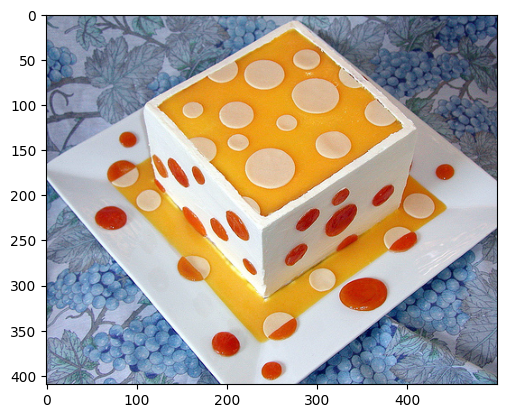

G:\My Drive\MIRFLICKR\mirflickr25k\im4620.jpg 2008:03:16 11:41:51 0.4873958333333333 0.6384282112121582 0.1510323778788249


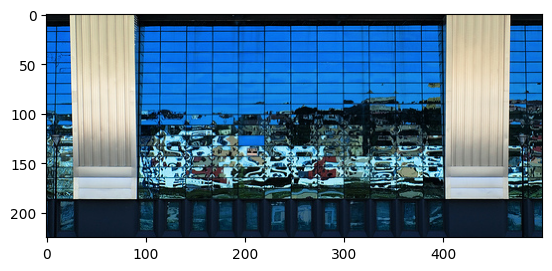

G:\My Drive\MIRFLICKR\mirflickr25k\im5771.jpg 2008:02:21 14:12:28 0.5919907407407408 0.6384464502334595 0.04645570949271871


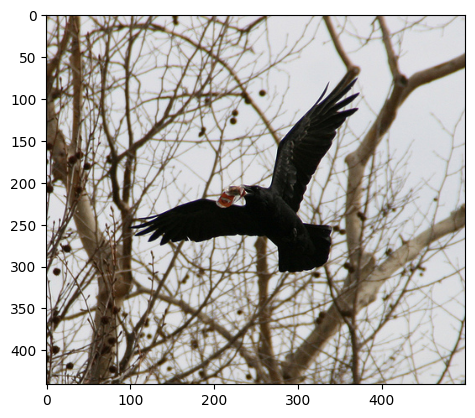

G:\My Drive\MIRFLICKR\mirflickr25k\im4938.jpg 2008:03:11 14:08:43 0.589386574074074 0.6386556029319763 0.0492690288579023


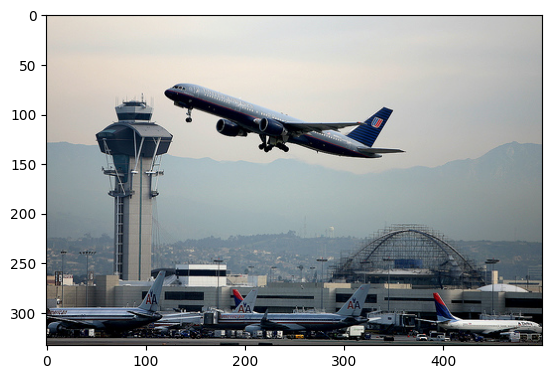

G:\My Drive\MIRFLICKR\mirflickr25k\im5258.jpg 2003:01:24 16:55:49 0.7054282407407407 0.6352044939994812 0.07022374674125953


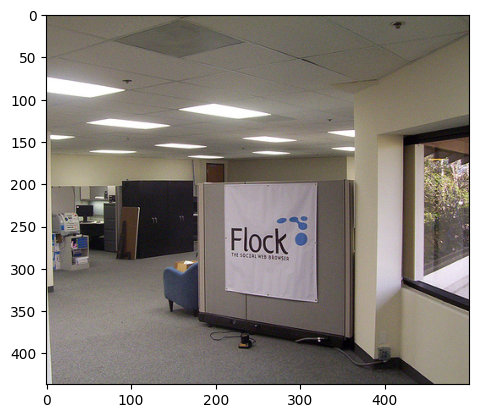

G:\My Drive\MIRFLICKR\mirflickr25k\im1443.jpg 2008:05:04 06:19:49 0.2637615740740741 0.6382375955581665 0.3744760214840924


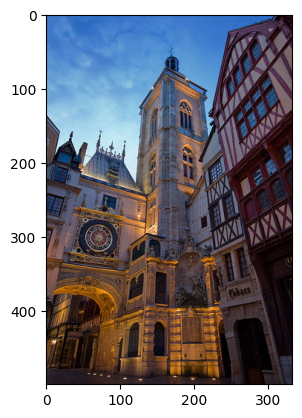

G:\My Drive\MIRFLICKR\mirflickr25k\im9130.jpg 2007:12:10 12:16:40 0.5115740740740741 0.6383043527603149 0.12673027868624087


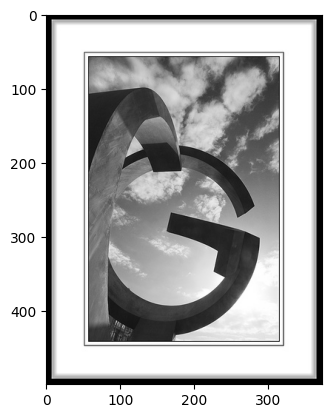

G:\My Drive\MIRFLICKR\mirflickr25k\im5949.jpg 2008:02:09 18:48:59 0.7840162037037037 0.6386577486991882 0.1453584550045155


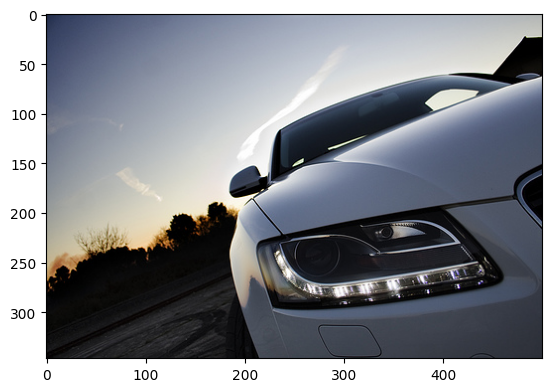

G:\My Drive\MIRFLICKR\mirflickr25k\im22527.jpg 2007:04:30 16:45:22 0.6981712962962963 0.6382927298545837 0.05987856644171252


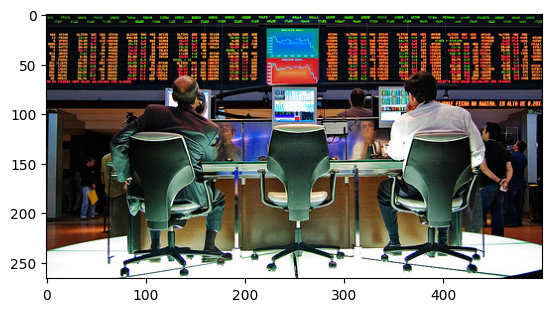

G:\My Drive\MIRFLICKR\mirflickr25k\im23283.jpg 2007:04:18 17:42:08 0.7375925925925926 0.638464093208313 0.09912849938427959


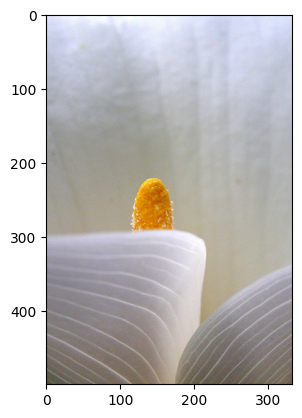

G:\My Drive\MIRFLICKR\mirflickr25k\im16390.jpg 2007:08:01 21:57:01 0.9145949074074076 0.6382372975349426 0.27635760987246494


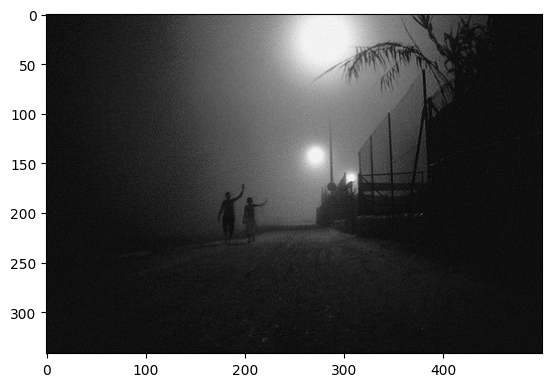

G:\My Drive\MIRFLICKR\mirflickr25k\im8285.jpg 2007:12:12 01:13:05 0.0507523148148148 0.6384584307670593 0.41229388404775547


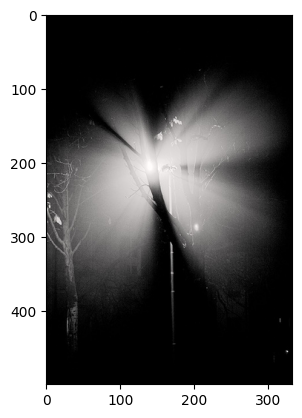

In [7]:
for idx, (path, datetime, norm_time, pred, error) in predictions.sample(n=20).iterrows():
    print(path, datetime, norm_time, pred, error)
    plt.imshow(Image.open(path))
    plt.show()